In [1]:
using Interact, Plots, DifferentialEquations, LinearAlgebra
using NonLinearDynamicsCourse

WebIO._IJuliaInit()

# Flujo 2D Espacio de fases y campo vector

Los flujos en una dimensión, si bien pueden bifurcar, tienen un repertorio muy limitado de comportamientos (básicamente diverger a infinito o converger a un punto fijo). 

Los flujos en 2D incorporan un nuevo comportamiento y un nuevo conjunto límite (o equilibrio) además de los puntos fijos. El comportamiento nuevo es la **oscilación** y el nuevo equilibrio asociado con la oscilación se llama **ciclo límite**. Esto, como es de imaginarse, amplía muchísimo el repertorio de comportamientos posibles y agrega un nuevo tipo de bifurcación que no está presente en flujos 1D (bifurcación de Hopf). 

Otro nuevo ingrediente que incorporan los flujos 2D es que además de puntos fijos atractores y repulsores existen puntos fijos que son atractores en una dirección y repulsores en otra, motivo por el cual se llaman puntos silla (o saddle) en alusión a la forma de la silla de montar que atrae en la direccion frente-atrás pero repele hacia los costados. Por otra parte, esas direcciones en las que se aproximan o alejan de los puntos silla van a funcionar como organizadoras del flujo global. 

La organización del flujo global es un último elemento que se agrega en los flujos de dos dimensiones, porque pueden ocurrir cambios topológicos en dicha organización sin que haya cambios locales. Todas las bifurcaciones que vimos hasta ahora ocurren por cambios en la cantidad y estabilidad de puntos fijos y se conocen como **bifurcaciones locales**. Las bifurcaciones asociadaa a los cambios en la organización topológica del flujo que no son no reducibles a cambios en los puntos fijos se conocen como  **bifurcaciones globales**, y son bastante más difíciles de estudiar. 

Finalmente, muchas de las propiedades, estrategias de análisis y herramientas numéricas que vamos a ver para flujos 2D nos van a servir para sistemas de mayor dimensión. El único comportamiento que no es posible en flujos 2D y que va a aparecer recién cuando incorporemos una dimensión adicional es el aperiódico con sensibilidad a las condiciones iniciales, también llamado caótico. 

En esta primera parte vamos a ver algunas caracteristicas de los flujos 2D a través de dos ejemplos simples: un sistema lineal, el oscilador armónico amortiguado y un sistema no lineal, el auto-oscilador de van der Pol. La idea es ganar algo de intuición sobre el comportamiento de las trayectorias en el espacio de fases antes de pasar al análisis que va a seguir una secuencia muy similar a la que empleamos en los flujos 1D: cálculo de los puntos fijos y su estabilidad y determinación de las posibles bifurcaciones al variar los parámetros. Una aclaracion sobre el término "posibles bifurcaciones". Acá se utiliza posibles en el sentido de potencial, porque la bifurcación es algo que sucede sólo si variamos los parámetros, y no porque haya ningún sentido de probabilidad en el uso de ese término. Las ecuaciónes son deterministas y las bifurcaciones también lo son.

## Forma general del flujo

Un flujo 2D en el plano $(x,y)$ de forma general esta dado por las ecuaciones diferenciales:

$\dot{x} = f(x,y)$

$\dot{y} = g(x,y)$

donde $f$ y $g$ son dos funciones de dos variables que tambien pueden verse como una **funcion vectorial** o un **campo vector**. Este último nombre proviene del hecho de que a cada punto del espacio de fases $(x,y)$ (el **campo**) le corresponde un par de valores que forman un **vector** tangente a la trayectoria en ese punto, es decir que apuntan en la direccion del flujo. 

El nombre "flujo" toma un sentido mas literal en dos dimensiones, porque las trayectorias pueden verse como las lineas de flujo de un fluído moviéndose en dos dimensiones y el campo vector como el campo de velocidades de ese fluído. Por supuesto que esta es una imagen mental porque los fluídos reales obedecen a sus propias ecuaciones mientras que $f$ y $g$ son funciones arbitrarias. Pero siguiendo con la analogía líquida, los puntos fijos atractores podrían interpretarse como sumideros (sinks) de flujo y los repulsores como fuentes (sources). Y vamos a ver que las direcciones atractoras de los puntos silla funcionan como "divisorias de aguas" que separan diferentes "cuencas de atracción" que llevan a diferentes conjuntos límites o sea diferentes destinos.

Para ilustrar esto vamos a ver algunos ejemplos de sistemas dinámicos en 2D sin hacer ningún tipo de análisis, sólo para ver algunas formas de representar el flujo en el espacio de fases. 

## Ejemplos de flujo: oscilador armónico amortiguado y oscilador de van der Pol

Comenzamos con el oscilador armónico amortiguado, que es un sistema lineal:

$\dot{x} = y$

$\dot{y} = -Kx -\gamma y$

La primera ecuacion solo especifica que la variacion temporal de la posicion corresponde a la velocidad. 

La segunda ecuacion, que proviene de la segunda Ley de Newton combinada con la Ley de Hooke especifica que la variacion de la velocidad (aceleracion) es propocional a la posicion con una constante $K>0$ y signo negativo y que la fricción conduce por si sola a un decaimiento exponencial de la velocidad (recordar el efecto de un término lineal con signo negativo en los sistemas lineales 1D) con una constante positiva $\gamma$

In [2]:
function oscharmdamp!(du,u,p,t)
    (K,γ) = p
    du[1] = u[2]
    du[2] = -K*u[1]-γ*u[2]
    return 
end    

oscharmdamp! (generic function with 1 method)

Un par de comentarios sobre la forma de esta función. Por un lado ya no puede ser definida en una linea por eso tiene la forma `function`+nombre(argumentos)+proceso+`end`. 

Las funciones pueden modificar sus argumentos y en ese caso su nombre termina con un "bang" $!$. Esta forma de definir la funcion se llama "in place" porque asigna el valor del array `du` dentro de la funcion y es la forma recomendada para integrar el sistema con el paquete `DifferentialEquations`. Como toda funcion de Julia, devuelve la ultima linea. Colocar `return` solo hace que la funcion no devuelva nada. La otra forma se llama "out of place" y se define sin el bang, no necesita `du` como argumento sino que lo define adentro de la funcion y termina con `return du`.  

Lo último para agregar es que en la primera linea de la función hacemos un "unpacking" del vector de parámetros $p$ para mayor claridad. En este caso no es muy necesario pero mas adelante cuando tengamos muchos parámetros no va a ser facil recordar a qué correspondia $p[5]$.

Vamos a elegir primero la representación más simple del flujo, que es la de una trayectoria para un determinada condición inicial, y lo hacemos integrando directamente el sistema con solve:

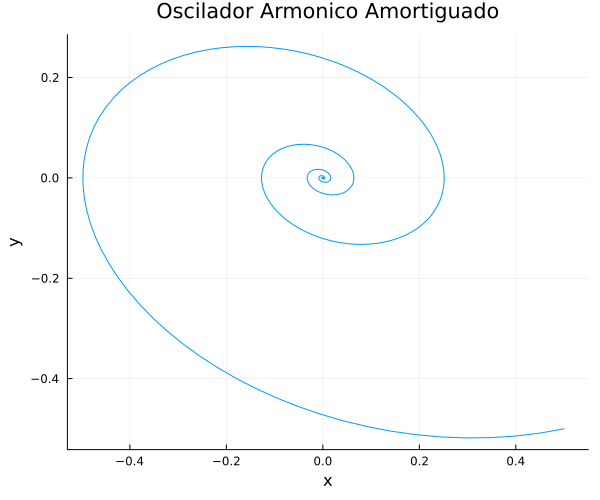

In [18]:
u0 = [0.5;-0.5]
K = 0.5; γ=0.3
tspan = (0,100.0)
prob = ODEProblem(oscharmdamp!, u0, tspan, [K,γ])
sol = solve(prob)
plot(sol,idxs=(1,2),legend=false,xlabel="x",ylabel="y",size=(600,500),title="Oscilador Armonico Amortiguado")

Que como era de esperarse partiendo de $(0.5,-0.5)$ converge en forma de espiral al único punto fijo en el origen (atractor o sumidero).

Lo siguiente es representar un conjunto de trayectorias, que también podemos hacer de forma directa usando `EnsambleProblem` y definiendo (por única vez) una función (`prob_func`) que resetea la condición inicial (`remake`) a  la  i-ésima condicion inicial de un array de condiciones iniciales ($u0\_arr$). $i$ es un contador interno del ensemble.

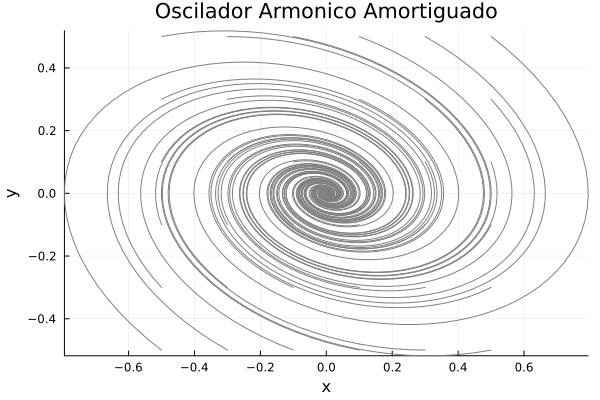

In [19]:
u0_arr = vec([[0.2*i-0.5,0.2*j-0.5] for i=0:5, j=0:5]) 

function prob_func(prob,i,repeat)
  remake(prob,u0=u0_arr[i])
end

ensemble_prob = EnsembleProblem(prob,prob_func=prob_func)
sol = solve(ensemble_prob,EnsembleThreads(),trajectories=length(u0_arr))
plot(sol,idxs=(1,2),color=:gray,xlabel="x",ylabel="y",title="Oscilador Armonico Amortiguado")

Para representaciones más acabadas vamos a usar algunas funciones de la librería del curso. Por ejemplo, para ilustrar la idea del "campo vector" vamos a usar la funcion `flux2d_vectorfield` que en su método básico recibe sólo dos argumentos obligatorios en orden:
- la funcion del sistema dinamico definida in-place
- el vector de parámetros

Luego tiene como parametros opcionales (siempre invocados con nombre):
- xlims: los limites en el rango x (default [-1,1])
- ylims: los limites en el rango y (default [-1,1]) conviene que sea similar a xlims por una cuestion de escala
- npts: la cantidad de puntos en un lado de la grilla (hace una grilla cuadrada). Por defecto es 21 asi que hace 441 vectores.
- scale: una escala para aplicar a los vectores (por defecto es 1.0)
- size: el tamaño del gráfico. Util para cambiar la relacion de aspecto. Por defecto size=(600,600)


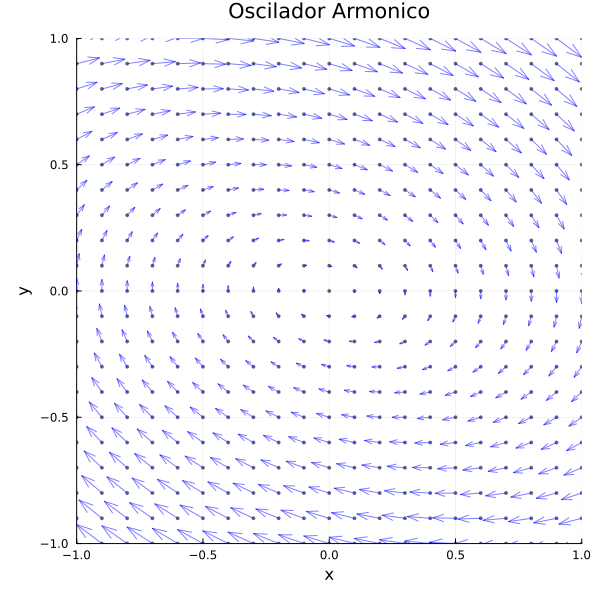

In [5]:
flux2d_vectorfield(oscharmdamp!,[K,γ];title="Oscilador Armonico")

Podemos incorporar al campo vector una trayectoria que parte de un punto incial usando un segundo método de la función anterior si pasamos como argumentos

- la funcion del sistema dinamico definida in-place
- el vector con la condición inicial
- el tiempo total de integración 
- el vector de parámetros

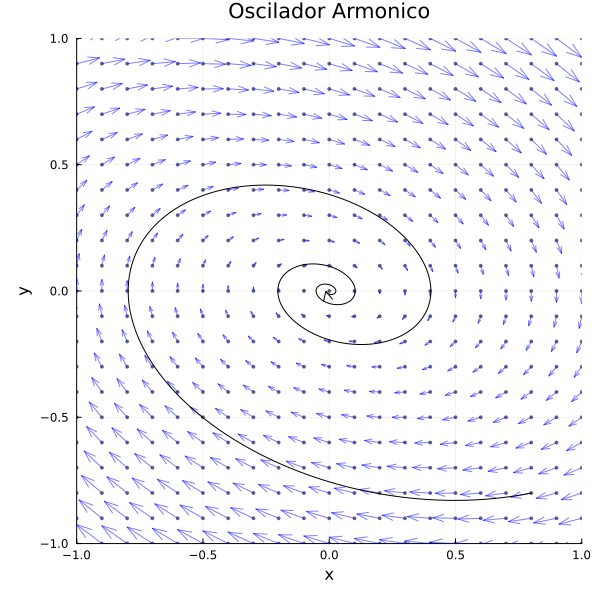

In [6]:
flux2d_vectorfield(oscharmdamp!,[0.8,-0.8],30.0,[K,γ];title="Oscilador Armonico")

Se puede apreciar que para puntos cercanos a la curva el vector del campo es tangente a la curva. Podemos pensar a la trayectoria negra (la solución de las ecuaciones diferenciales para la condicion inicial $(0.8,-0.8)$) como una particula flotando en la superficie del fluido guiada por los vectores azules. Notar que además los vectores nos dan una información adicional que no está en la trayectoria: la velocidad a la que evoluciona el estado del sistema sobre la trayectoria. Por ejemplo cuando $x$ e $y$ tienen el mismo signo (arriba a la derecha y abajo a la izquierda) las trayectorias evolucionan más rápido (los vectores son mas largos) que en el caso contrario. Por que?

Vamos a ver otro campo vector pero ahora de un sistema no lineal, para ilustrar algún comportamiento del flujo diferente de la convergencia a un punto fijo. Elegimos el oscilador no lineal de **Van der Pol** que vamos a ver con más detalle más adelante:

$\begin{aligned}
\dot{x} & = y \\
\dot{y} & =  -Kx-\gamma y(x^2-1)  
\end{aligned}$


In [7]:
function vdp!(du,u,p,t)
    (K,γ) = p
    du[1] = u[2]
    du[2] = -K*u[1]-γ*u[2]*(u[1]*u[1]-1.0)
    return # no devuelve nada
end    

vdp! (generic function with 1 method)

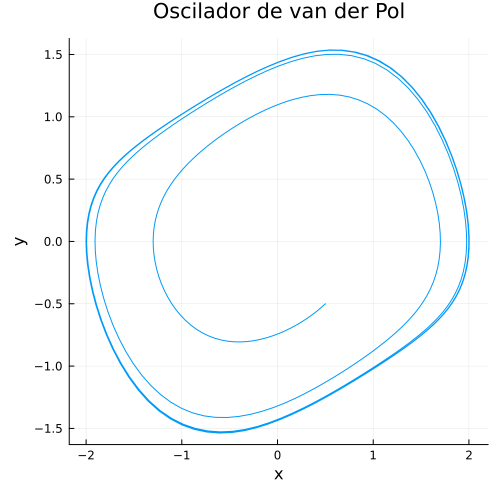

In [20]:
u0 = [0.5;-0.5]
K = 0.5; γ=0.3
tspan = (0,100.0)
prob = ODEProblem(vdp!, u0, tspan, [K,γ])
sol = solve(prob)
plot(sol,idxs=(1,2),legend=false,xlabel="x",ylabel="y",size=(500,500),title="Oscilador de van der Pol")

La trayectoria no converge a un punto fijo sino a un **ciclo límite** atractor. Esto es una trayectoria cerrada sin puntos fijos que da lugar a un comportamiento periódico estable (auto oscilación) ya que todas las trayectorias en un entorno del ciclo límite convergen a él. 

Es decir que las trayectorias que estan dentro del ciclo se mueven en espiral hacia afuera y las que estan fuera del ciclo se mueven en espiral hacia adentro. Si bien en este caso no podemos usar la analogia del potencial como en sistemas 1D, si podemos imaginar el ciclo límite atractor como el movimiento de una bolita forzada a rotar en el fondo de una "budinera" circular, cualquier apartamiento la vuelve a llevar al cauce circular del fondo:

<div>
<img src="../files/mexican1.png" width="300px">
</div>

Tambien existen ciclos límites repulsores en la que todas las trayectorias cercanas se alejan de él, espiralando hacia afuera si esta fuera y hacia adentro si estan dentro. Obviamente no es facil detectar estos ciclos porque las trayectorias se alejan de él, pero sí son importantes como organizadores del flujo global porque funcionan como "divisorias de aguas". Podemos imaginar la trayectoria de la bolita rotando pero ahora en la budinera dada vuelta (el plato del perro). Podría hace equilibrio sobre el borde, pero cualquier perturbación la hace deslizar hacia el centro o la expele hacia afuera:

<div>
<img src="../files/mexican2.png" width="300px">
</div>


Vamos a resolver un ensamble de condiciones iniciales para poder ver este comportamiento de las órbitas


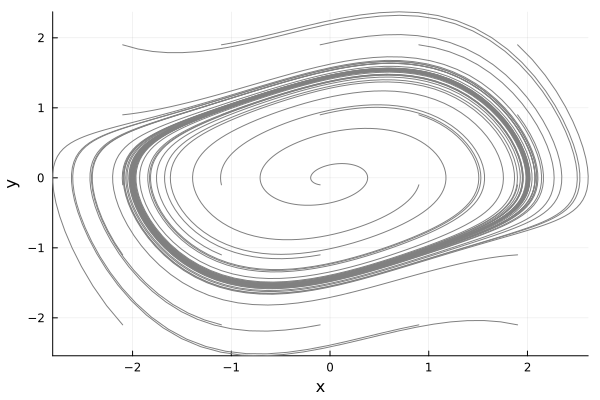

In [21]:
u0_arr = vec([[i-2.1,j-2.1] for i=0:4, j=0:4]) 
ensemble_prob = EnsembleProblem(prob,prob_func=prob_func)
sol = solve(ensemble_prob,EnsembleThreads(),trajectories=length(u0_arr))
plot(sol,idxs=(1,2),color=:gray,xlabel="x",ylabel="y")

Finalmente graficamos el campo vector junto con dos condiciones iniciales, una que comienza dentro y otra fuera del ciclo límite, para ello usamos un método adicional de `flux2d_vectorfield` en el cual en lugar de pasar como segundo argumento un vector con una única condición inicial le pasamos un array de condiciones iniciales:

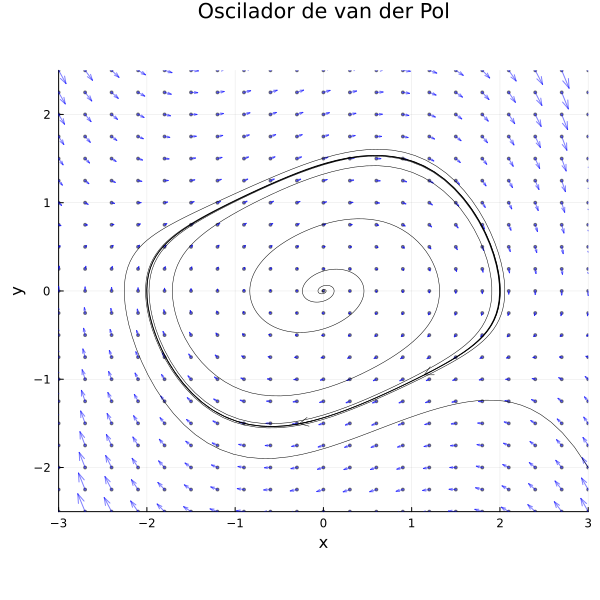

In [10]:
xlims=[-3,3]; ylims=[-2.5,2.5]
u0_array=[[0.005;-0.005],[3.0;-2.0]]
flux2d_vectorfield(vdp!,u0_array,100.0,[K,γ];xlims=xlims,ylims=ylims,title="Oscilador de van der Pol")

En este caso se puede ver con las flechas la orgnizacion global del flujo y el sentido de giro (antihorario) del ciclo límite. Por otra parte elegimos una condición inicial muy cercana al origen $(0,0)$ para mostrar que hay un punto fijo repulsor (una fuente de flujo). Esto va a ser muy frecuente. Un ciclo límite atractor atrae globalmente el flujo desde fuera, pero desde adentro tiene que ser alimentado por alguna fuente de flujo, en este caso es un punto fijo repulsor que se dice que "alimenta" el ciclo límite desde adentro. De la misma forma un ciclo límite inestable tiene que "alimentar" un atractor dentro (que puede ser un punto fijo).

## Puntos Fijos y Nulclinas

Los puntos fijos de un flujo 2D general:

$\dot{x} = f(x,y)$

$\dot{y} = g(x,y)$

van a ser aquellos puntos del plano $(x,y)$ que anulen simultáneamente las funciones $f$ y $g$. Es decir que de forma general vamos a tener que encontrar los pares $(x_*,y_*)$ que satisfagan:

$f(x_*,y_*)=0$

$g(x_*,y_*)=0$


En los dos ejemplos que vimos antes el origen $(x=0,y=0)$ es un punto fijo y es el único posible. Por qué? En ambos casos $f(x,y)=y$, que se anula sólo cuando $y=0$. O sea que podemos asumir que $y=0$ como un requisito para el punto fijo y resolver entonces $g(x,0)=0$. Para ambos casos tenemos $g(x,0)=-Kx$ que se anula solo para $x=0$. Es decir que el único punto fijo es el origen. En el caso del oscilador amortiguado ese punto fijo es un atractor y en el caso del oscilador de Van der Pol es un repulsor (mas adelante vamos a ver como determinar la estabilidad). 

Pero calcular los puntos fijos en casos mas generales no va ser tan sencillo. Vamos a introducir el concepto de **nulclina** que va a ayudarnos para determinar los puntos fijos y de paso darnos algunas claves de la organización del flujo. 

Las nulclinas son las dos curvas determinadas en el plano por las condiciones de que una de las derivadas se anula por separado. 

Es decir que: 

- La primer nulclina va a estar determinada por todos los puntos donde $\dot{x}=0$ y en esos puntos el campo vector siempre apunta hacia arriba o hacia abajo (no hay flujo horizontal justamente porque $\dot{x}=0$), o sea que **las trayectorias cortan siempre verticalmente a esta nulclina**. 
- La segunda nulclina por su parte va a estar determinada por todos los puntos donde $\dot{y}=0$ y en esos puntos el campo vector siempre apunta hacia la derecha o la izquierda, o sea que **las trayectorias cortan siempre horizontalmente esta segunda nulclina** (tienen inclinación nula en la direccion vertical de ahi el nombre). 

Los puntos fijos van a estar determinados por los puntos donde estas dos curvas nulclinas se cortan, ya que en esos puntos se satisfacen las dos condiciones $f(x_*,y_*)=0$ $g(x_*,y_*)=0$ simultáneamente. De forma general, las nulclinas van a ser curvas en el espacio de fases. En el caso mas sencillo de un sistema lineal van a ser líneas rectas.

Vamos a ver el caso mas simple del oscilador amortiguado para que se entienda mejor la interpretacion geométrica de la nuclina en términos del flujo. La primera nuclina sucede en todos los puntos donde $f(x,y)=y=0$. Es decir que en este caso la nulclina de $x$ es una recta que coincide con el eje horizontal. Si vemos el gráfico de abajo podemos ver que todas las flechas que cortan esta nulclina (línea roja) apuntan hacia arriba (a la izquierda) o hacia abajo (a la derecha del punto fijo) y la trayectoria (en negro) corta siempre esta nulclina de forma vertical.

La segunda nulclina sucede cuando $g(x,y)=-Kx-\gamma y = 0$. De esta ecuación podemos despejar $y$ en función de $x$ como $y=-Kx/\gamma $ que corresponde a una recta que pasa por el origen de pendiente $-K/\gamma$. En el grafico corresponde a la línea verde y se puede ver que en sus inmediaciones el campo vector apunta hacia la derecha (arriba del punto fijo) u hacia la izquierda (abajo) y que la trayectoria siempre corta esta nulclina horizontalmente.

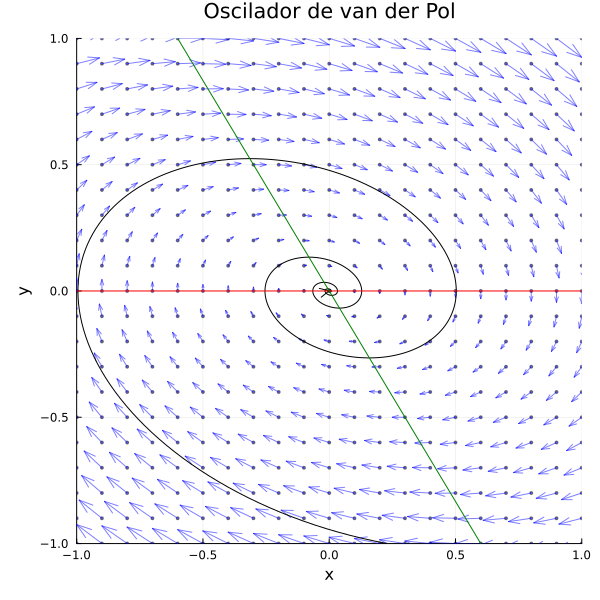

In [11]:
p1 =  flux2d_vectorfield(oscharmdamp!,[1.0,-1.0],50.0,[K,γ])
plot!(p1,[-1,1],[0,0],c=:red)
plot!(p1,[-1,1],[K/γ,-K/γ],c=:green,title="Oscilador de van der Pol")

Como era de esperar esas dos rectas se cortan en el punto fijo en el origen. Y de acá podemos inferir que se generaliza a 2D lo que habiamos observado en flujos 1D: **los sistemas lineales de forma general tienen un único punto fijo** ya que dos rectas de forma general se cortan en un único punto (excluimos los casos particulares en el que las dos rectas coinciden o son paralelas).

Para el caso del oscilador de van der Pol la primera nulclina es la misma $y=0$, pero para la segunda nulclina tenemos que resolver $-Kx-\gamma y(x^2-1) =0$. Si despejamos $y$ nos queda una función racional con dos asíntotas verticales en $\pm 1$. 

$y=\displaystyle\frac{K}{\gamma}\frac{x}{1-x^2}$

Podemos graficar esa función definiendo un array para $x$ y luego calculando los valores de $y$. El grafico de las dos nulclinas junto con el campo vector y las dos trayectorias que convergen al ciclo límite pueden graficarse juntas como:

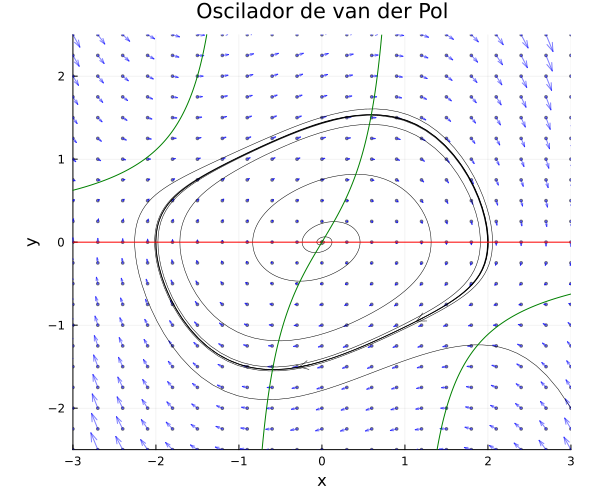

In [12]:
x = -3.0:0.01:3.0
y = K*x./(γ.*(1 .-x.^2))
xlims=[-3,3]; ylims=[-2.5,2.5]
p1 = flux2d_vectorfield(vdp!,u0_array,100.0,[K,γ];xlims=xlims,ylims=ylims,size=(600,500))
plot!(p1,[-3,3],[0,0],c=:red)
plot!(p1,x,y,c=:green,title="Oscilador de van der Pol")

En este caso la curva verde tambien corta a la roja sólo en el origen, pero tiene una forma más compleja que de alguna manera "curva" el flujo y nos permite inferir algunas características globales. 

Podemos ver que la curva verde divide el espacio de fases en 4 regiones diferentes (porque tiene tres ramas) y si a eso le sumamos que la curva roja divide en dos las dos regiones centrales obtenemos seis regiones diferentes. En cada una de esas regiones el flujo apunta en una dirección determinada de las cuatro combinaciones posibles entre arriba-abajo y derecha-izquierda. Ejemplo: en la region que está en la esquina inferior derecha todas las flechas apuntan hacia "arriba e izquierda" y al cruzar la primera curva verde desde la esquina "arriba" cambia por "abajo" y sobre la curva se hace horizontal. Lo mismo se puede observar en cada una de las regiones. 

Pero cómo determinar en qué regiones el flujo apunta en qué dirección? Tomemos el caso más simple, la nulclina de $\dot{x}=0$ que corresponde a la linea roja horizontal. Esa nulclina me divide el espacio de fases en dos regiones: arriba donde todo el flujo va hacia la derecha (porque $\dot{x}=y>0$) y abajo donde todo el flujo va hacia la izquierda. 

<div>
<img src="../files/vdpflux1.png" width="300px">
</div>

En el caso de la curva verde vamos a tener que evaluar el signo de la función $g(x,y)$ que no es difícil de calcular. Si $g(x,y)>0$ sabemos que el flujo va hacia arriba y si se da el caso contrario va a apuntar hacia abajo. Además tenemos que evaluarlo en una sola de esas regiones ya que cada vez que crucemos la curva verde va cambiar de arriba abajo y viceversa. 

<div>
<img src="../files/vdpflux2.png" width="300px">
</div>

Si combinamos ambos gráficos determinamos todas las regiones en las que el flujo va hacia arriba-abajo derecha-izquierda y tenemos una pista muy importante sobre el comportamiento global del flujo.

Para visualizar esto sin necesidad de tener que calcularlo a mano vamos a usar la función `flux2d_nullclines` que ademas de representar las curvas nulclinas $\dot{x}=0$ en rojo y $\dot{y}=0$ en verde va a diferenciar las regiones que dividen estas nulclinas con colores con transparencia y nos va a permitir determinar la direccion del flujo en cada una de ellas. 

Vamos a utilizar los siguientes colores con transparencia para los signos de cada una de las derivadas:

- color verde para el flujo hacia la derecha ($\dot{x}>0$)
- color rojo para el flujo hacia la izquierda ($\dot{x}<0$)
- color amarillo para el flujo hacia arriba ($\dot{y}>0$)
- color azul para el flujo hacia abajo ($\dot{y}<0$)

La combinacion de los colores va a dar cuatro tipos diferentes de regiones:

- color verde + azul = cyan donde el flujo va hacia la derecha ($\dot{x}>0$) y abajo ($\dot{y}<0$)
- color verde + amarillo = verde donde el flujo va hacia la derecha ($\dot{x}>0$) y arriba ($\dot{y}>0$)
- color rojo + amarillo = naranja donde el flujo va hacia la izquierda ($\dot{x}<0$) y arriba ($\dot{y}>0$)
- color rojo + azul = magenta donde el flujo va hacia la izquierda ($\dot{x}<0$) y abajo ($\dot{y}<0$)

Veamos primero en el caso sencillo del oscilador amortiguado. El método básico del `flux2d_nullclines` tiene los mismos argumentos obligatorios y optativos que la función anterior (salvo scale), pero además incorpora dos parámetros optativos que modifican la visualización:

- regions (por defecto regions=true) colorea las regiones con los signos de las derivadas (regions=false grafica solo las nulclinas)
- vectorfield (por defecto vectorfield=false) incorpora el campo vector al gráfico

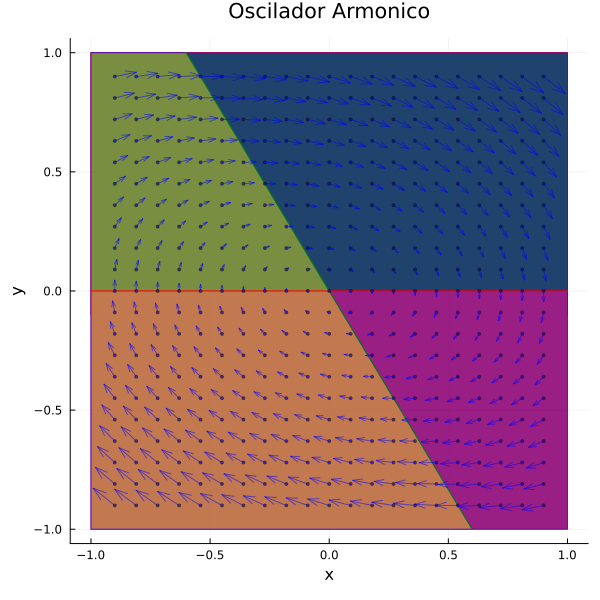

In [13]:
flux2d_nullclines(oscharmdamp!,[K,γ];vectorfield=true,size=(600,600),title="Oscilador Armonico")

En el grafico la nulclina para $\dot{x}=0$ ($y=0$) es la linea horizontal en rojo y divide al espacio en dos regiones: una arriba con el flujo a la derecha $\dot{x}>0$ que pintamos de verde (con transparencia) y otra abajo con el flujo hacia la izquierda $\dot{x}<0$ que pintamos de rojo. Mientras que la nulclina para $\dot{y}=0$ ($y=-Kx/\gamma$) es la linea diagonal en verde que divide el espacio de fases también en dos regiones: una a la derecha con el flujo hacia abajo $\dot{y}<0$ que pintamos de azul y otra a la izquierda con el flujo hacia arriba $\dot{y}<0$ que pintamos de amarillo.

Al igual que antes podemos incorporar una trayectoria.

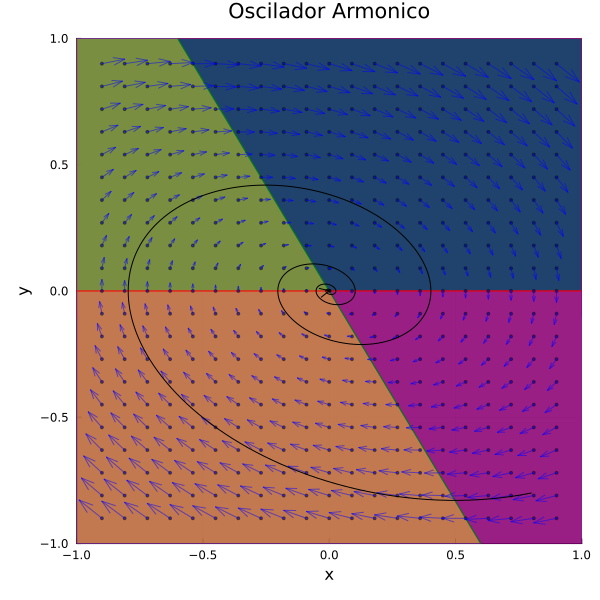

In [14]:
flux2d_nullclines(oscharmdamp!,[0.8,-0.8],50.0,[K,γ];vectorfield=true,size=(600,600),title="Oscilador Armonico")

La inclinación de la nulclina verde ($\dot{y}=0$) y el ordenamiento de las nulclinas nos puede servir también para determinar que el flujo es atraido hacia el punto fijo. En efecto, el ordenamiento con magenta a la derecha y naranja en la izquierda para $y<0$ hace que el flujo abajo del eje horizontal primero baje y luego suba, mientras que el ordenamiento verde cyan de izquierda a derecha arriba del eje hace que primero suba y luego baje, lo cual hace que el flujo gire en torno al origen (si estuvieran la regiones en el orden contrario tendriamos un punto silla). Por otra parte el angulo formado por las regiones naranja y cyan es mayor que las verde y magenta. Por lo tanto el flujo cuando está abajo es empujado más hacia arriba (naranja) y cuando esta arriba es empujado más hacia abajo (cyan), lo cual hace que el flujo sea atraído hacia el centro. 

Para contrastar esta descripción intuitiva vamos a conceder la posibilidad de cambiar el signo de $K$ y $\gamma$ de forma interactiva:

In [15]:
@manipulate throttle=0.5 for γn=-0.3:0.05:0.3,Kn=-0.5:0.1:0.5
    flux2d_nullclines(oscharmdamp!,[0;0.4],10.0,[Kn,γn];vectorfield=true,size=(600,500),title="Oscilador Armonico")
end 

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["γn"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 13, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
7, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000008d9fc7d0, Task (runnable) @0x000000008d9fc7d0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-0.3\",\"-0.25\",\"-0.2\",\"-0.15\",\"-0.1\",\"-0.05\",\"0.0\",\"0.05\",\"0.1\",\"0.15\",\"0.2\",\"0.25\",\"0.3\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"17001044059211627843\",\"id\":\"1502

Notar que para $K>0$ un valor negativo de $\gamma$ hace la pendiente de la nuclina sea positiva. En este caso todavia mantiene el mismo ordenamiento de las regiones pero ahora el magenta domina abajo y el verde domina arriba por lo que el flujo se aleja del centro (repulsor). Mientras que para $K<0$ se altera el orden de las regiones y tenemos un punto silla.

Veamos ahora lo mismo para el oscilador de van der Pol, con varias trayectorias superpuestas

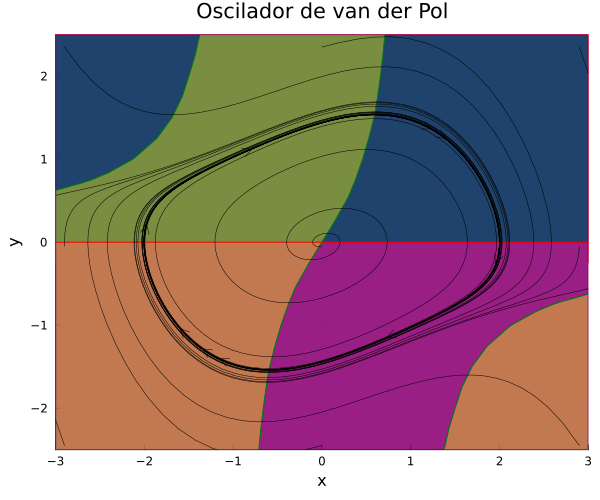

In [16]:
u0_arr = vec([[-2.9+i*5.8/2;-2.45+j*4.8/2] for i=0:2, j=0:2])
flux2d_nullclines(vdp!,u0_arr,100.0,[K,γ];xlims=xlims,ylims=ylims,size=(600,500),title="Oscilador de van der Pol")

Notar que para pasar de la region naranja a la verde o de la cyan a la magenta hay que cruzar la nulclina roja y en la frontera todas las trayectorias son verticales (esto es porque ahi $\dot{x}=0$). Mientras que para cruzar de la region cyan a la verde o de la naranja a la magenta se cruza la nulclina verde y allí todas las trayectorias son horizontales (estrictamente sobre la nuclina $\dot{y}=0$). Al mismo tiempo no se puede pasar de la region verde a la magenta directo o de la azul a la naranja, salvo a traves de los puntos fijos.

Finalmente vamos a explorar de forma interactiva como se modifica el retratos de fase y las regiones de positividad de las nuclinas como los parámetros $(K,\gamma)$ en el oscilador de van der Pol. Notar sobre todo como cambia la forma del ciclo límite atractor y cómo se aproxima a la nulclina verde para valores bajos de $K$ y altos de $\gamma$.

In [17]:
@manipulate throttle=0.5 for Kn=0.05:0.01:1.0, γn=0.1:0.01:0.85
    flux2d_nullclines(vdp!,u0_arr,100.0,[Kn,γn];
        xlims=xlims,ylims=ylims,size=(600,500),title="Oscilador de van der Pol")
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["Kn"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 96, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
48, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000a04ea6d0, Task (runnable) @0x00000000a04ea6d0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"0.19\",\"0.2\",\"0.21\",\"0.22\",\"0.23\",\"0.24\",\"0.25\",\"0.26\",\"0.27\",\"0.28

Con esto concluimos esta parte más descriptiva de los flujos 2D. La parte analítica sigue un recorrido similar al que vimos para flujos 1D: cálculo de puntos fijos y su estabilidad y determinación de posibles bifurcaciones. Pero antes vamos a estudiar en detalle los sistemas lineales y la estabilidad de su único punto fijo. 

Esto nos va a servir después para determinar la estabilidad de los puntos fijos en sistemas no lineales (incluso hasta cierto punto en sistemas de mayor dimensión que dos, como vamos a ver al final del curso), ya que, al igual que en los flujos 1D, en un entorno suficientemente pequeño del punto fijo el campo vector del sistema no lineal es topológicamente equivalente a un sistema lineal obtenido mediante el método de linealización. 

Qué es el método de linealización? Mas adelante lo vamos a definir de forma general para más dimensiones. Pero para flujos 1D recordamos que era quedarnos con el primer término lineal del desarrollo de Taylor en un entorno del punto fijo. Es decir, para el campo vector de una sola variable en un entorno del punto fijo $x_*$:

 $f(x) = f(x_*) + f'(x_*)(x-x_*) + f''(x_*)(x-x_*)^2 + \dots \\
 f(x) \approx f'(x_*)(x-x_*) $
 
El primer término es cero porque estamos en el punto fijo y los términos cuadráticos y de orden superior son más chico que el lineal suficientemente cerca del punto fijo. Recordar que esto nos había llevado a asociar la derivada en el punto fijo con la estabilidad. Si la derivada era positiva el punto era repulsor y si la derivada negativa era atractor porque el sistema linealizado correspondia a una exponencial decreciente o creciente.
 
En los flujos 2D los sistemas lineales también nos van a servir para aplicarlos luego al estudio de la estabilidad de los puntos fijos.